In [1]:
import sys
sys.path.append('../')
from tracker import Tracker
import pickle
from draw_annotation import *
from team_assigner import *
from player_ball_assigner import *
import cv2
from perspective_changer import perspectiveChanger
from video_2_frames import video2frames
from ultralytics import YOLO
import torch

In [2]:
video_path_left='../input-video/test-left-1q.mp4'
pic_path_left='../input-pic/1q/left'
video_path_right='../input-video/test-right-1q.mp4'
pic_path_right='../input-pic/1q/right'
frames_path='frames-1q-5(10fps).pkl'
v2f=video2frames(frames_path)
frame_dict=v2f.get_1fps(pic_path_left,pic_path_right,
                        video_path_left,video_path_right)
frames_left=frame_dict['left']
frames_right=frame_dict['right']

frame.pkl exists!
loading frame file...
frame.pkl loaded!


In [3]:
# 트래커 클래스 시작
model_path_player='../model/best-player-detector.pt'
model_path_ball='../model/best-ball-detector.pt'
tracker=Tracker(model_path_player,
                model_path_ball)

In [4]:
yolo_tracks=tracker.detect_player(frames_left)

0: 416x736 4 players, 10.1ms
1: 416x736 4 players, 10.1ms
2: 416x736 4 players, 10.1ms
3: 416x736 4 players, 10.1ms
4: 416x736 4 players, 10.1ms
5: 416x736 4 players, 10.1ms
6: 416x736 4 players, 10.1ms
7: 416x736 4 players, 10.1ms
8: 416x736 4 players, 10.1ms
9: 416x736 4 players, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 4 players, 7.5ms
1: 416x736 4 players, 7.5ms
2: 416x736 4 players, 7.5ms
3: 416x736 4 players, 7.5ms
4: 416x736 4 players, 7.5ms
5: 416x736 4 players, 7.5ms
6: 416x736 4 players, 7.5ms
7: 416x736 4 players, 7.5ms
8: 416x736 4 players, 7.5ms
9: 416x736 4 players, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 4 players, 7.6ms
1: 416x736 3 players, 7.6ms
2: 416x736 3 players, 7.6ms
3: 416x736 3 players, 7.6ms
4: 416x736 3 players, 7.6ms
5: 416x736 3 players, 7.6ms
6: 416x736 2 players, 7.6ms
7: 416x736 2 players, 7.6ms
8: 416x736 

In [5]:
player_tracks=[]
fail_frames=[]
for frame_num,result in enumerate(yolo_tracks):
    player_tracks.append({})
    try:
        track_ids=result.boxes.id.int().cpu().tolist()
        boxes=result.boxes.xyxy.cpu()
        for track_id,bbox in zip(track_ids,boxes):
            player_tracks[frame_num][track_id]={'bbox':[int(i) for i in bbox.tolist()],
                                                'pitch_side':'left'}
        print(f"{frame_num} Done!")
    except:
        fail_frames.append(frame_num)
        continue

0 Done!
1 Done!
2 Done!
3 Done!
4 Done!
5 Done!
6 Done!
7 Done!
8 Done!
9 Done!
10 Done!
11 Done!
12 Done!
13 Done!
14 Done!
15 Done!
16 Done!
17 Done!
18 Done!
19 Done!
20 Done!
21 Done!
22 Done!
23 Done!
24 Done!
25 Done!
26 Done!
27 Done!
28 Done!
29 Done!
30 Done!
31 Done!
32 Done!
33 Done!
34 Done!
35 Done!
36 Done!
37 Done!
38 Done!
39 Done!
40 Done!
41 Done!
42 Done!
43 Done!
44 Done!
45 Done!
46 Done!
47 Done!
48 Done!
49 Done!
50 Done!
51 Done!
52 Done!
53 Done!
54 Done!
55 Done!
56 Done!
57 Done!
58 Done!
59 Done!
60 Done!
61 Done!
62 Done!
63 Done!
64 Done!
65 Done!
66 Done!
67 Done!
68 Done!
69 Done!
70 Done!
71 Done!
72 Done!
73 Done!
74 Done!
75 Done!
76 Done!
77 Done!
78 Done!
79 Done!
80 Done!
81 Done!
82 Done!
83 Done!
84 Done!
85 Done!
86 Done!
87 Done!
88 Done!
89 Done!
90 Done!
91 Done!
92 Done!
93 Done!
94 Done!
95 Done!
96 Done!
97 Done!
98 Done!
99 Done!
100 Done!
101 Done!
102 Done!
103 Done!
104 Done!
105 Done!
106 Done!
107 Done!
108 Done!
109 Done!
110 Done!


In [6]:
import matplotlib.pyplot as plt

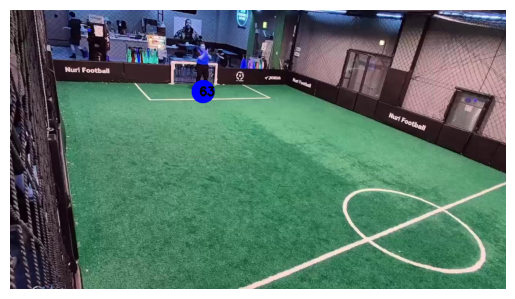

In [7]:
output_frames=[]
for frame_num,resutls in enumerate(player_tracks):
    frame0=frames_left[frame_num].copy()
    for id,values in player_tracks[frame_num].items():
        bbox=values['bbox']
        x_center,_=get_center_of_bbox(bbox)
        y_under=int(bbox[-1])
        values['coord_frame']=[x_center,y_under]
        cv2.circle(frame0,[x_center,y_under],30,[0,0,255],cv2.FILLED)
        cv2.putText(frame0,f"{id}",[x_center-10,y_under+10],cv2.FONT_HERSHEY_SIMPLEX,1,[0,0,0],3)
    output_frames.append(frame0)
plt.imshow(frame0)
plt.axis('off')
plt.show()

In [8]:
from utils import *

In [9]:
save_video(output_frames,'test-output.avi')